In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [5]:
cols = ['id', 'Clump Thickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitosis', 'Class']
df = pd.read_csv("datasets/BreastCancer/BreastCancerWc.csv", names=cols, header=None)

In [6]:
df

,id,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [7]:
df.describe()

,id,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitosis,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitosis                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [9]:
df.isna().sum()

id                             0
Clump Thickness                0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitosis                        0
Class                          0
dtype: int64

In [89]:
df = df[df['Bare Nuclei'] != '?']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

<h3>2. Error correcting(Outlier detection and removal)</h3>

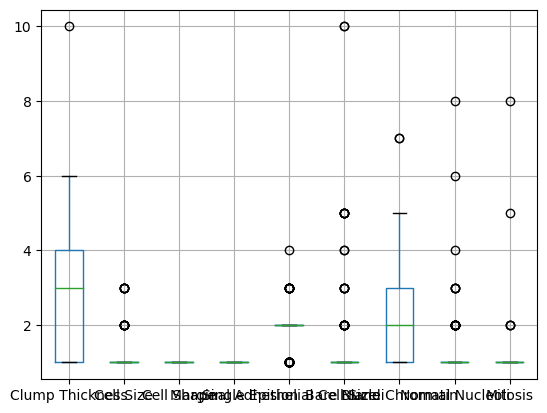

In [90]:
columns = ['Clump Thickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitosis']

df[columns].boxplot()
plt.show()

In [91]:
def outliers_graph(df_column):
    Q75, Q25 = np.percentile(df_column, [75, 25])
    IQR = Q75 - Q25
    print(f"###### {df_column.name} ######")
    print(f"Q75: {Q75}")
    print(f"Q25: {Q25}")
    print(f"Inter Quartile Range: {IQR}") 
    print(f"Outliers lie before {Q25-1.5*IQR} and beyond {Q75+1.5*IQR}")
    print(f"No of rows with left extreme outliers: {len(df[df_column < Q25-1.5*IQR])}")
    print(f"No of rows with right extreme outliers: {len(df[df_column > Q75+1.5*IQR])}")  
    print("********************************************************************")
    return [Q25, Q75, IQR]

In [92]:
columns = ['Clump Thickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion']
for col in columns:
    [Q25, Q75, IQR] = outliers_graph(df[col])
    df = df[(df[col] >= Q25-1.5*IQR) & (df[col] <= Q75+1.5*IQR)]

###### Clump Thickness ######
Q75: 4.0
Q25: 1.0
Inter Quartile Range: 3.0
Outliers lie before -3.5 and beyond 8.5
No of rows with left extreme outliers: 0
No of rows with right extreme outliers: 1
********************************************************************
###### Cell Size ######
Q75: 1.0
Q25: 1.0
Inter Quartile Range: 0.0
Outliers lie before 1.0 and beyond 1.0
No of rows with left extreme outliers: 0
No of rows with right extreme outliers: 15
********************************************************************
###### Cell Shape ######
Q75: 1.0
Q25: 1.0
Inter Quartile Range: 0.0
Outliers lie before 1.0 and beyond 1.0
No of rows with left extreme outliers: 0
No of rows with right extreme outliers: 0
********************************************************************
###### Marginal Adhesion ######
Q75: 1.0
Q25: 1.0
Inter Quartile Range: 0.0
Outliers lie before 1.0 and beyond 1.0
No of rows with left extreme outliers: 0
No of rows with right extreme outliers: 0
****************

In [93]:
df

,id,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
6,1018099,1,1,1,1,2,10.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
10,1035283,1,1,1,1,1,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
689,654546,1,1,1,1,2,1.0,1,1,8,2
692,714039,3,1,1,1,2,1.0,1,1,1,2
693,763235,3,1,1,1,2,1.0,2,1,2,2
694,776715,3,1,1,1,3,2.0,1,1,1,2


<h3>4. Model Building</h3>

In [101]:
df = df.dropna(how='any', axis=1)

x = df.drop(['id', 'Class'], axis=1)
y = df['Class']